In [25]:
import tensorflow as tf
import numpy as np

#tf.placeholder
x=tf.placeholder(tf.float32,shape=(None,784))
W=tf.placeholder(tf.float32,shape=(784,10))
y=tf.matmul(x,W)

In [26]:
xs=np.random.rand(5,784)
Ws=np.random.rand(784,10)

with tf.Session() as sess:
    print(sess.run(y,feed_dict={
        x:xs,
        W:Ws
    }))  

[[ 195.53392029  189.77926636  194.62741089  202.14468384  189.58084106
   199.58322144  195.20481873  190.6022644   194.05389404  193.91743469]
 [ 196.18235779  192.5553894   197.35043335  196.70593262  190.71998596
   199.52102661  191.37109375  194.67582703  194.85449219  198.79170227]
 [ 195.0617981   183.27845764  195.37431335  198.37734985  186.20944214
   193.1784668   192.26022339  184.29029846  187.97254944  195.79733276]
 [ 194.3704834   196.11782837  195.33155823  197.71351624  193.21069336
   196.8727417   197.33491516  189.48248291  194.25762939  195.85548401]
 [ 197.8578186   193.58325195  198.62527466  202.52989197  193.59815979
   194.77435303  199.65112305  191.87380981  194.06900024  196.26556396]]


In [7]:
#创建变量
m1=tf.constant([[3,3]])
m2=tf.constant([[2],[4]])
#创建矩阵乘法18
product=tf.matmul(m1,m2)
#定义会话
sess=tf.Session()

print(sess.run(product))
sess.close()

[[18]]


In [9]:
#另一种写法
with tf.Session() as sess:
    result=sess.run(product)
result

array([[18]], dtype=int32)

In [12]:
#变量的使用
x=tf.Variable([1,2])
a=tf.constant([3,3])

sub=tf.subtract(x,a)
add=tf.add(x,sub)

#变量需要初始化
init=tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    res=sess.run(add)
res

array([-1,  1], dtype=int32)

In [13]:
state=tf.Variable(0,name='counter')
new_value=tf.add(state,1)
#赋值操作
update=tf.assign(state,new_value)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for _ in range(5):
        res=sess.run(update)
        print(res)

1
2
3
4
5


 ### Fetch and Feed

In [15]:
#Fetch
input1=tf.constant(3.0)
input2=tf.constant(2.0)
input3 =tf.constant(5.0)

add=tf.add(input2,input3)
mul=tf.multiply(input1,add)

with tf.Session() as sess:
    res=sess.run([mul,add])
res


[21.0, 7.0]

In [27]:
#Feed
input1=tf.placeholder(tf.float32)
input2=tf.placeholder(tf.float32)

output=tf.multiply(input1,input2)

with tf.Session() as sess:
    res=sess.run(output,feed_dict={input1:[7.],input2:[2.0]})
res

array([ 14.], dtype=float32)

### 简单示例

In [43]:
x_data=np.random.rand(100)
y_data=x_data*0.1+0.2

#构造线性模型
b=tf.Variable(0.)
k=tf.Variable(0.)
y=k*x_data+b

#代价函数
loss=tf.reduce_mean(tf.square(y_data-y))
#定义优化器
optimizer=tf.train.GradientDescentOptimizer(0.2)
#最小化代价函数
train=optimizer.minimize(loss)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train)
        if step%20==0:
            print(step,sess.run([k,b]))
        

0 [0.049370527, 0.098643027]
20 [0.10004677, 0.19997644]
40 [0.10002679, 0.19998659]
60 [0.10001533, 0.19999233]
80 [0.10000879, 0.19999559]
100 [0.10000504, 0.19999748]
120 [0.10000289, 0.19999856]
140 [0.10000166, 0.19999917]
160 [0.10000097, 0.19999951]
180 [0.10000056, 0.19999972]


### 拟合二次函数

In [79]:
import matplotlib.pyplot as plt

#从-0.5，0.5中生成均匀分布的200个点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]

noise=np.random.normal(0.,0.02,x_data.shape)
y_data=np.square(x_data)+noise

x_data.shape,y_data.shape

((200, 1), (200, 1))

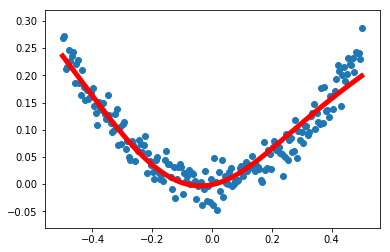

In [80]:
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1=tf.Variable(tf.random_normal([1,10]))
biases_L1=tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1
#激活函数
L1=tf.nn.tanh(Wx_plus_b_L1)

#输出层
Weights_L2=tf.Variable(tf.random_normal([10,1]))
biases_L2=tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)

#代价函数及训练
loss=tf.reduce_mean(tf.square(y-prediction))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
    
    #绘制样本
    plt.figure()
    plt.scatter(x_data,y_data)
    #绘制模型
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()
        

In [3]:
import tensorflow as tf
print(tf.__version__)

1.8.0
